In [71]:
import numpy as np
import matplotlib.pyplot as plt

In [72]:
np.random.seed(0) 
Num = 100

In [73]:
# x(x1,x2) y 0/1
# y = 1
x_1 = np.random.normal(6,1,size = (Num)) #满足高斯分布，参数是中心点，方差，size  
x_2 = np.random.normal(3,1,size = (Num)) #shift tab组合键,函数用法
y = np.ones(Num)
c_1 = np.array([x_1,x_2,y])
c_1.shape

(3, 100)

In [74]:
# y = 0
x_1 = np.random.normal(3,1,size = (Num)) #满足高斯分布，参数是中心点，方差，size  
x_2 = np.random.normal(6,1,size = (Num)) #shift tab组合键,函数用法
y = np.zeros(Num)
c_0 = np.array([x_1,x_2,y])
c_0.shape

(3, 100)

In [75]:
c_1 = c_1.T
c_0 = c_0.T

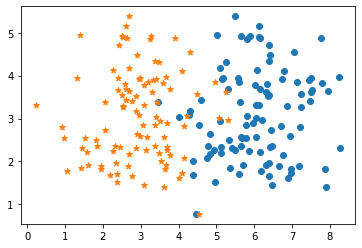

In [156]:
plt.scatter(c_1[:,0],c_1[:,1])
plt.scatter(c_0[:,0],c_1[:,1],marker = '*')

In [77]:
All_data = np.concatenate((c_1,c_0))
#在行上进行拼接，变成200行3列
All_data.shape

(200, 3)

In [44]:
np.random.shuffle(All_data)

In [157]:
train_data_x = All_data[:150,:2] #取前150个 前两列
train_data_y = All_data[:150,2]
test_data_x = All_data[150:,:2] #取后50个 前两列
test_data_y = All_data[150:,-1]
train_data_x.shape,train_data_y.shape

((150, 2), (150,))

In [105]:
# y=w1*x1+w2*x2
w = np.random.rand(2,1)
w

array([[0.53053721],
       [0.92211146]])

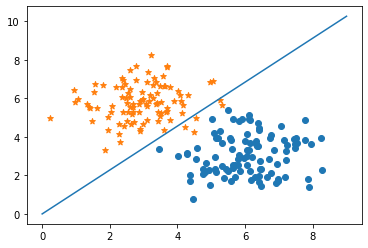

In [158]:
# y=w1*x1+w2*x2 =0
# w1*x1+w2*y=0
plt.scatter(c_1[:,0],c_1[:,1])
plt.scatter(c_0[:,0],c_0[:,1],marker ='*')
x = np.arange(10)
y = -(w[0]*x)/w[1]
plt.plot(x,y)

In [107]:
#定义损失函数,交叉熵
def cross_entropy(y,y_hat):
    return -np.mean(y*np.log(y_hat)+(1-y)*np.log(1-y_hat))

In [108]:
#y_hat=sigmoid(w*x)
def sigmoid(z):
    return 1./(1+np.exp(-z))

In [109]:
w.shape,train_data_x.shape

((2, 1), (150, 2))

In [135]:
train_data_x.shape,train_data_y.shape,y_hat.shape

((150, 2), (150,), (1, 50))

In [159]:
lr = 0.001
for i in range(1000):
    #计算loss值
    y_hat = sigmoid(np.dot(w.T,train_data_x.T))
    loss = cross_entropy(train_data_y,y_hat)
    #计算梯度
    grad =  - np.mean((train_data_x*(train_data_y.reshape(1,150)-y_hat).T),axis = 0 )
    # 更新w
    w = w-(lr*grad).reshape(2,1)
    # 输出
    if i%10 == 1:
        print("i: %d,loss: %f"%(i,loss))
    if loss < 0.1:
        break

i: 1,loss: 0.121847
i: 11,loss: 0.121644
i: 21,loss: 0.121443
i: 31,loss: 0.121242
i: 41,loss: 0.121042
i: 51,loss: 0.120842
i: 61,loss: 0.120644
i: 71,loss: 0.120447
i: 81,loss: 0.120251
i: 91,loss: 0.120055
i: 101,loss: 0.119861
i: 111,loss: 0.119667
i: 121,loss: 0.119474
i: 131,loss: 0.119282
i: 141,loss: 0.119091
i: 151,loss: 0.118901
i: 161,loss: 0.118711
i: 171,loss: 0.118523
i: 181,loss: 0.118335
i: 191,loss: 0.118148
i: 201,loss: 0.117962
i: 211,loss: 0.117777
i: 221,loss: 0.117592
i: 231,loss: 0.117409
i: 241,loss: 0.117226
i: 251,loss: 0.117044
i: 261,loss: 0.116862
i: 271,loss: 0.116682
i: 281,loss: 0.116502
i: 291,loss: 0.116324
i: 301,loss: 0.116145
i: 311,loss: 0.115968
i: 321,loss: 0.115791
i: 331,loss: 0.115616
i: 341,loss: 0.115441
i: 351,loss: 0.115266
i: 361,loss: 0.115093
i: 371,loss: 0.114920
i: 381,loss: 0.114748
i: 391,loss: 0.114576
i: 401,loss: 0.114406
i: 411,loss: 0.114236
i: 421,loss: 0.114066
i: 431,loss: 0.113898
i: 441,loss: 0.113730
i: 451,loss: 0.113563

In [152]:
w

array([[ 0.87814838],
       [-0.76967921]])

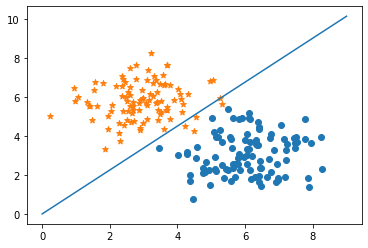

In [160]:
plt.scatter(c_1[:,0],c_1[:,1])
plt.scatter(c_0[:,0],c_0[:,1],marker ='*')
x = np.arange(10)
y = -(w[0]*x)/w[1]
plt.plot(x,y)

In [161]:
#预测
# y_hat= w1*x1+w2*x2
test_data_x.shape

(50, 2)

In [163]:
y_hat = np.dot(w.T,test_data_x.T)
y_pred = np.array(y_hat>0,dtype = int).flatten()
y_pred.shape
test_acc =np.sum(test_data_y==y_pred)/len(y_pred) 
test_acc

0.94